# Project 2: Linear Regression
### By Luke Faletti

The dataset I used for this project has house prices for King County, Washington from May 2014 to May 2015.
<img src="files/kc.png">

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import sklearn
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
# Setting the seed
np.random.seed(1)

# Reading data
data = pd.read_csv("kc_house_data.csv",sep=',', engine='python')
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Data succesfully imported, time to check the values.

In [3]:
print(data.isnull().any())
print(data.dtypes)

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_

No null values and the only value with the wrong type is the date.

In [4]:
data['date'] = pd.to_datetime(data['date'])

# Add new columns: log of price for better graphs, and years old (date minus year built) for regression
data['yrs_old'] = data['date'].dt.year + 1 - data['yr_built']
data['log_price'] = np.log2(data['price'])

data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_old,log_price
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,44.317818,18.824021
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.375493,0.759845
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,16.194603
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,19.000000,18.296477
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,41.000000,18.779565
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,64.000000,19.298940
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,116.000000,22.876427


Time to look through the data!

In [5]:
data['floors'].value_counts(sort=True)

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [6]:
data['bedrooms'].value_counts(sort=True)

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
data['bathrooms'].value_counts(sort=True)

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

1       30
2      172
3    14031
4     5679
5     1701
Name: condition, dtype: int64


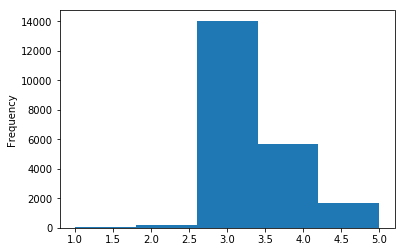

In [8]:
print(data['condition'].value_counts(sort=False))
data['condition'].plot.hist(bins=5)

1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64


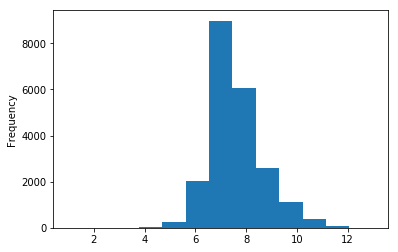

In [9]:
print(data['grade'].value_counts(sort=False))
data['grade'].plot.hist(bins=13)

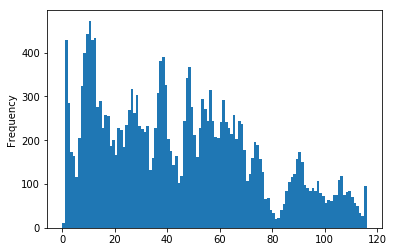

In [10]:
data['yrs_old'].plot.hist(bins=116)

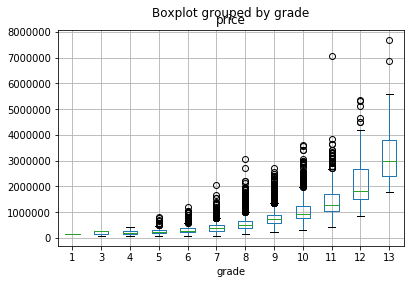

In [11]:
data.boxplot(column='price', by='grade')

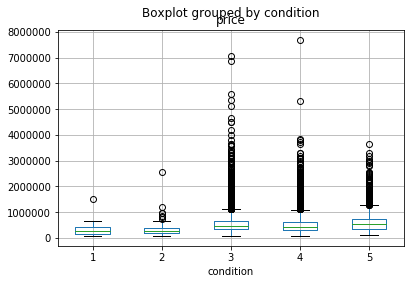

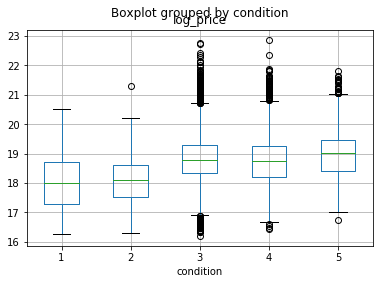

In [12]:
data.boxplot(column='price', by='condition')
data.boxplot(column='log_price', by='condition')

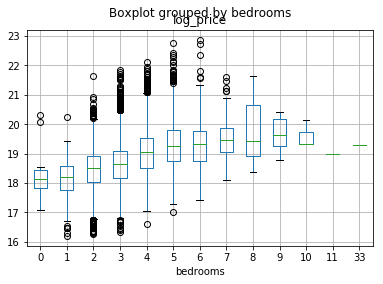

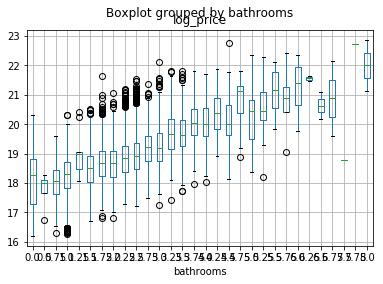

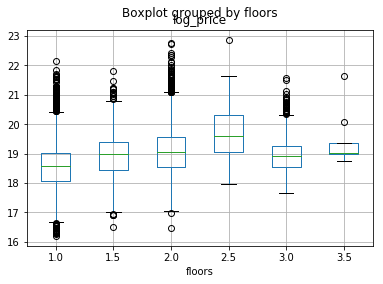

In [13]:
data.boxplot(column='log_price', by='bedrooms')
data.boxplot(column='log_price', by='bathrooms')
data.boxplot(column='log_price', by='floors')

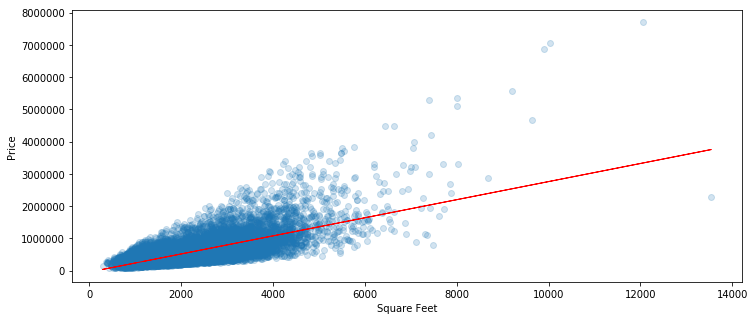

In [14]:
plot_data = data

plt.figure(figsize=(12,5))
plt.xlabel('Square Feet')
plt.ylabel('Price')

x, y = data['sqft_living'], data['price']
plt.scatter(x, y, alpha =.2)

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, fit_fn(x), color='red', linewidth=1)
plt.show()

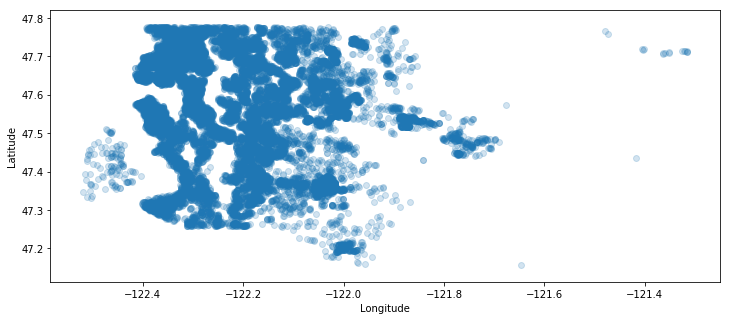

In [15]:
plot_data = data

plt.figure(figsize=(12,5))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

x, y = data['long'], data['lat']
plt.scatter(x, y, alpha =.2)
plt.show()

<img src='files/gmap.png'>

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_old,log_price
id,1,-0.017,0.0013,0.0052,-0.012,-0.13,0.019,-0.0027,0.012,-0.024,0.0081,-0.011,-0.0052,0.021,-0.017,-0.0082,-0.0019,0.021,-0.0029,-0.14,-0.021,-0.0038
price,-0.017,1,0.31,0.53,0.7,0.09,0.26,0.27,0.4,0.036,0.67,0.61,0.32,0.054,0.13,-0.053,0.31,0.022,0.59,0.082,-0.054,0.89
bedrooms,0.0013,0.31,1,0.52,0.58,0.032,0.18,-0.0066,0.08,0.028,0.36,0.48,0.3,0.15,0.019,-0.15,-0.0089,0.13,0.39,0.029,-0.15,0.34
bathrooms,0.0052,0.53,0.52,1,0.75,0.088,0.5,0.064,0.19,-0.12,0.66,0.69,0.28,0.51,0.051,-0.2,0.025,0.22,0.57,0.087,-0.51,0.55
sqft_living,-0.012,0.7,0.58,0.75,1,0.17,0.35,0.1,0.28,-0.059,0.76,0.88,0.44,0.32,0.055,-0.2,0.053,0.24,0.76,0.18,-0.32,0.7
sqft_lot,-0.13,0.09,0.032,0.088,0.17,1,-0.0052,0.022,0.075,-0.009,0.11,0.18,0.015,0.053,0.0076,-0.13,-0.086,0.23,0.14,0.72,-0.053,0.1
floors,0.019,0.26,0.18,0.5,0.35,-0.0052,1,0.024,0.029,-0.26,0.46,0.52,-0.25,0.49,0.0063,-0.059,0.05,0.13,0.28,-0.011,-0.49,0.31
waterfront,-0.0027,0.27,-0.0066,0.064,0.1,0.022,0.024,1,0.4,0.017,0.083,0.072,0.081,-0.026,0.093,0.03,-0.014,-0.042,0.086,0.031,0.026,0.17
view,0.012,0.4,0.08,0.19,0.28,0.075,0.029,0.4,1,0.046,0.25,0.17,0.28,-0.053,0.1,0.085,0.0062,-0.078,0.28,0.073,0.053,0.35
condition,-0.024,0.036,0.028,-0.12,-0.059,-0.009,-0.26,0.017,0.046,1,-0.14,-0.16,0.17,-0.36,-0.061,0.003,-0.015,-0.11,-0.093,-0.0034,0.36,0.04


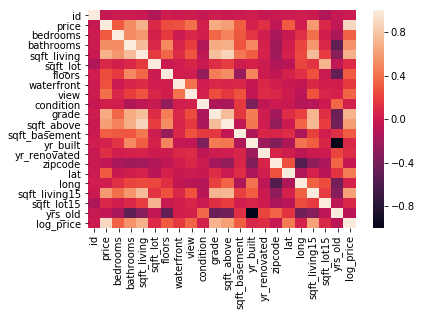

In [16]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)

In [17]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    
    return RSS, R_squared

In [18]:
#Initialization variables
Y = data['price']
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'lat', 'long', 'yrs_old']]
k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in range(1,len(X.columns) + 1):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [19]:
display(df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']])

,numb_features,RSS,R_squared,features
2,1,1.477276e+15,0.492853,"(sqft_living,)"
35,2,1.264138e+15,0.566023,"(sqft_living, lat)"
166,3,1.137508e+15,0.609495,"(sqft_living, view, lat)"
472,4,1.089206e+15,0.626077,"(sqft_living, waterfront, view, lat)"
956,5,1.059531e+15,0.636265,"(sqft_living, waterfront, view, lat, yrs_old)"
1208,6,1.038818e+15,0.643375,"(bedrooms, sqft_living, waterfront, view, lat,..."
1544,7,1.022138e+15,0.649101,"(bedrooms, bathrooms, sqft_living, waterfront,..."
1854,8,1.016192e+15,0.651143,"(bedrooms, bathrooms, sqft_living, floors, wat..."
2002,9,1.010860e+15,0.652973,"(bedrooms, bathrooms, sqft_living, floors, wat..."
2042,10,1.006632e+15,0.654425,"(bedrooms, bathrooms, sqft_living, floors, wat..."


In [20]:
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'lat', 'long', 'yrs_old']]
y = data[['price']]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=1)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16209, 11) (16209, 1)
(5404, 11) (5404, 1)


In [22]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

LinReg.fit(X_train, y_train)
y_predicted = LinReg.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error
print('Test data MSE:', mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))
print('Training data MSE:', mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

Test data MSE: 56907697242.25424
Training data MSE: 43185739336.3842


In [24]:
print(LinReg.coef_)
LinReg.score(X_test, y_test)

[[-4.59086805e+04  4.24837963e+04  2.64383398e+02 -4.22862972e-02
   4.34839830e+04  5.56572851e+05  5.88040699e+04  2.77334077e+04
   6.49021839e+05 -1.01339568e+05  1.70080225e+03]]


0.6445965413167689

In [25]:
lm = smf.ols(data=data, formula='price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+lat+long+yrs_old').fit()
print(lm.params)
lm.summary()

Intercept     -4.381175e+07
bedrooms      -4.831353e+04
bathrooms      4.805792e+04
sqft_living    2.685286e+02
sqft_lot      -4.857119e-02
floors         3.906078e+04
waterfront     5.696818e+05
view           6.096076e+04
condition      2.685507e+04
lat            6.367893e+05
long          -1.090182e+05
yrs_old        1.748837e+03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     3719.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:47:48   Log-Likelihood:            -2.9612e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21601   BIC:                         5.924e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.381e+07   1.52e+06    -28.748      0.000   -4.68e+07   -4.08e+07
bedrooms    -4.831e+04   2003.444    -24.115      0.000   -5.22e+04   -4.44e+04
bathrooms    4.806e+04   3404.165     14.117      0.000    4.14e+04    5.47e+04
sqft_living   268.5286      2.742     97.919      0.000     263.153     273.904
sqft_lot       -0.0486      0.037     -1.306      0.191      -0.121       0.024
floors       3.906e+04   3386.825     11.533      0.000    3.24e+04    4.57e+04
waterfront   5.697e+05   1.86e+04     30.688      0.000    5.33e+05    6.06e+05
view         6.096e+04   2221.730     27.438      0.000    5.66e+04    6.53e+04
condition    2.686e+04   2459.759     10.918      0.000     2.2e+04    3.17e+04
lat          6.368e+05    1.1e+04     57.948      0.000    6.15e+05    6.58e+05
long         -1.09e+05    1.2e+04     -9.074      0.000   -1.33e+05   -8.55e+04
yrs_old      1748.8370     71.090     24.600      0.000    1609.496    1888.178
==============================================================================
Omnibus:                    15607.325   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           876365.776
Skew:                           2.904   Prob(JB):                         0.00
Kurtosis:                      33.650   Cond. No.                     4.58e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""